In [1]:
# import packages for the linear regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1. Data Import

## Feel the data and null check values

In [12]:
# read data into a DataFrame
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
# the above link is not valid
data = pd.read_csv('P1train.csv', index_col=0)
data.tail(10)
data.index.name = data.index.name.replace(' ', '_')
data.columns = data.columns.str.replace(' ', '_')
data.isnull().sum()                    #find sum of NaN in each columns
print(data.tail(20))
print(data.info())


            MS_Zoning  Lot_Frontage  Lot_Area Street Alley Lot_Shape  \
MS_SubClass                                                            
60                 RL          23.0       821   Pave   NaN       Reg   
20                 RL          20.0       816   Pave   NaN       Reg   
20                 RL           NaN      1475   Pave   NaN       IR1   
75                 RM          18.0       669   Pave   NaN       Reg   
50                 RM          16.0       569   Pave   NaN       Reg   
60                 RL          20.0       786   Pave   NaN       IR1   
60                 RL          23.0       895   Pave   NaN       Reg   
20                 RL          26.0      1434   Pave   NaN       Reg   
120                RL          11.0       476   Pave   NaN       IR1   
50                 RL          26.0       992   Pave   NaN       Reg   
20                 RL          22.0       825   Pave   NaN       Reg   
20                 RL          28.0       974   Pave   NaN      

(array([  2.,   0.,   6.,  31., 151., 810., 902., 409., 109.,  10.]),
 array([ 9.16366796,  9.57148154,  9.97929511, 10.38710869, 10.79492226,
        11.20273583, 11.61054941, 12.01836298, 12.42617656, 12.83399013,
        13.24180371]),
 <BarContainer object of 10 artists>)

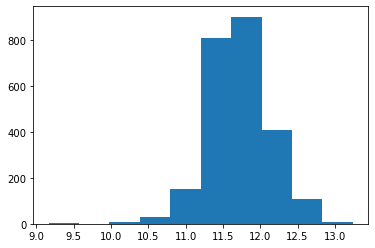

In [3]:
#data['log_value'] = np.log(data['SalePrice'])
plt.hist(np.log(data['SalePrice']))


## Replace non-numerical data with single digit

<AxesSubplot:xlabel='Garage_Cars', ylabel='SalePrice'>

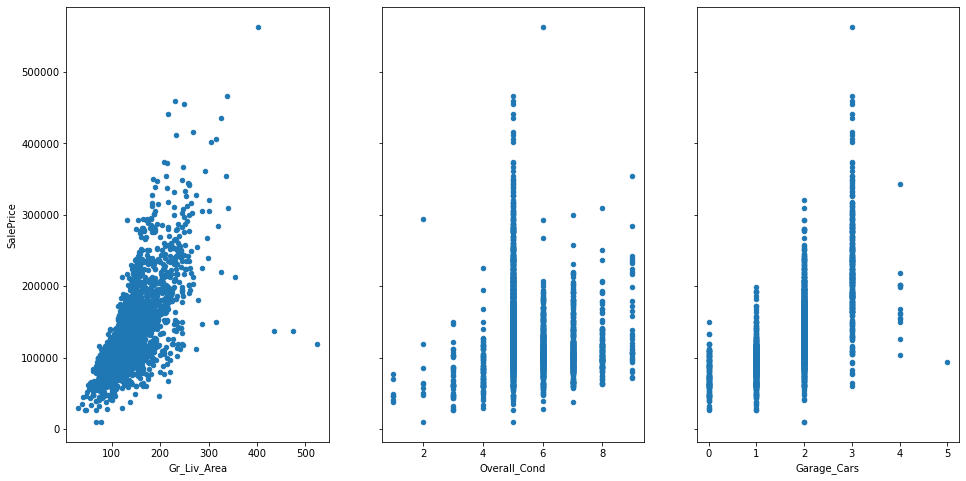

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Gr_Liv_Area', y='SalePrice', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Overall_Cond', y='SalePrice', ax=axs[1])
data.plot(kind='scatter', x='Garage_Cars', y='SalePrice', ax=axs[2])


# 2. Simple Linear Regression
Simple linear regression is an approach for predicting a quantitative response using a single feature. Here we use TV as the predictor, and the Sales as response to set up the linear regression.

## 2.1 Estimating the model parameters

<AxesSubplot:xlabel='Bsmt_Unf_SF', ylabel='SalePrice'>

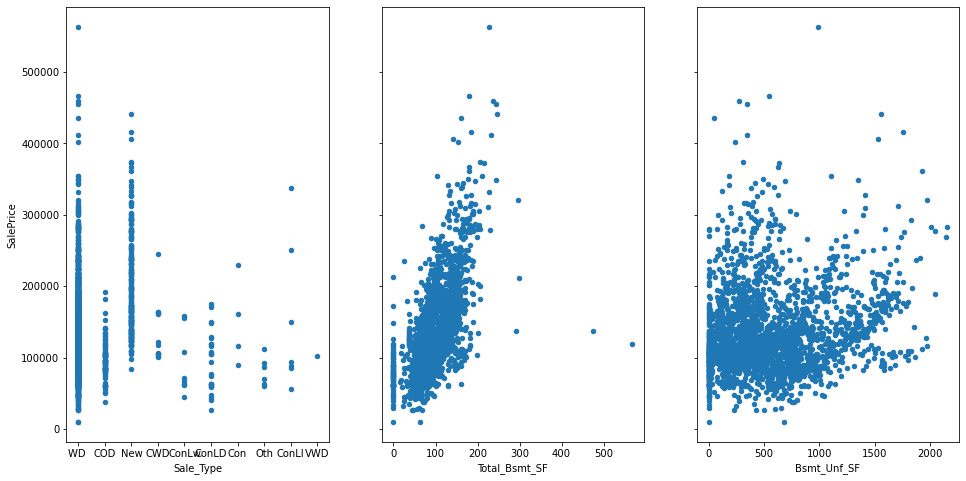

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='Sale_Type', y='SalePrice', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Total_Bsmt_SF', y='SalePrice', ax=axs[1])
data.plot(kind='scatter', x='Bsmt_Unf_SF', y='SalePrice', ax=axs[2])

In [6]:
# make sure to update patsy version to 0.5.1
import patsy

In [80]:
patsy.__version__

'0.5.1'

                            OLS Regression Results                            
Dep. Variable:      np.log(SalePrice)   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     2945.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        20:46:48   Log-Likelihood:                 595.31
No. Observations:                2429   AIC:                            -1183.
Df Residuals:                    2425   BIC:                            -1159.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.2296      0.017    590.856   

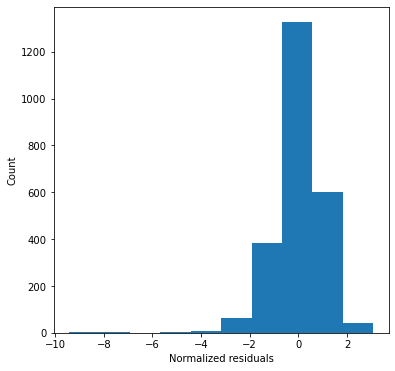

<Figure size 432x432 with 0 Axes>

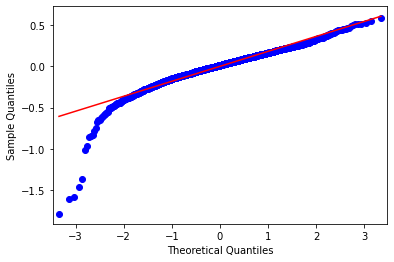

In [7]:
# create a fitted model
lm = smf.ols(formula= 'np.log(SalePrice) ~ Gr_Liv_Area + Overall_Qual + Garage_Cars', data=data).fit()
#lm = smf.ols(formula= 'SalePrice ~ Total_Bsmt_SF + Overall_Qual + Garage_Area', data=data).fit()
#+ Garage_Cars 

# print the coefficients
lm.params

# summary of the model
print(lm.summary())


# get the residuals of the fitted model
res = lm.resid

import statsmodels.api as sm
import scipy.stats as stats

f1 = plt.figure(figsize=(6,6))
f1 = plt.hist(lm.resid_pearson)
f1 = plt.ylabel('Count')
f1 = plt.xlabel('Normalized residuals') 

fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(res, stats.distributions.norm, line='r') 
# plt.show()

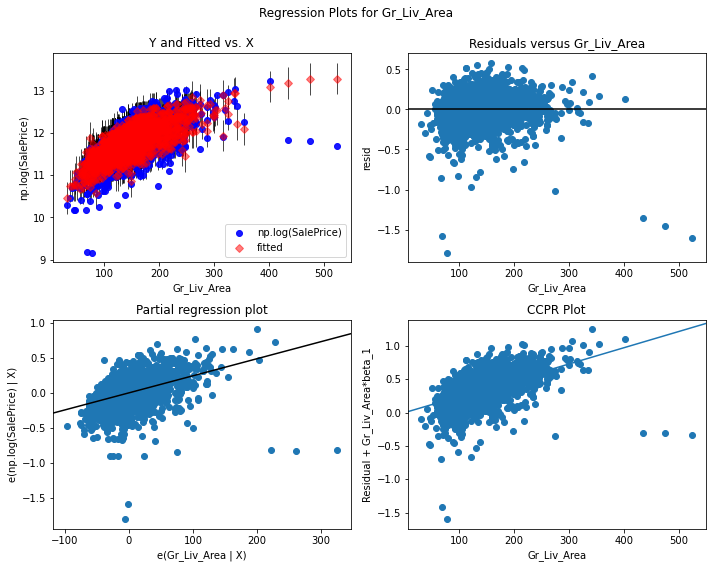

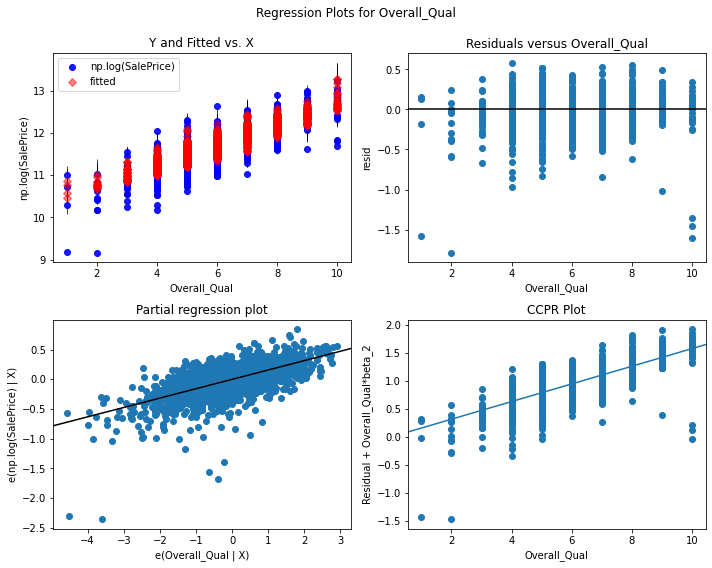

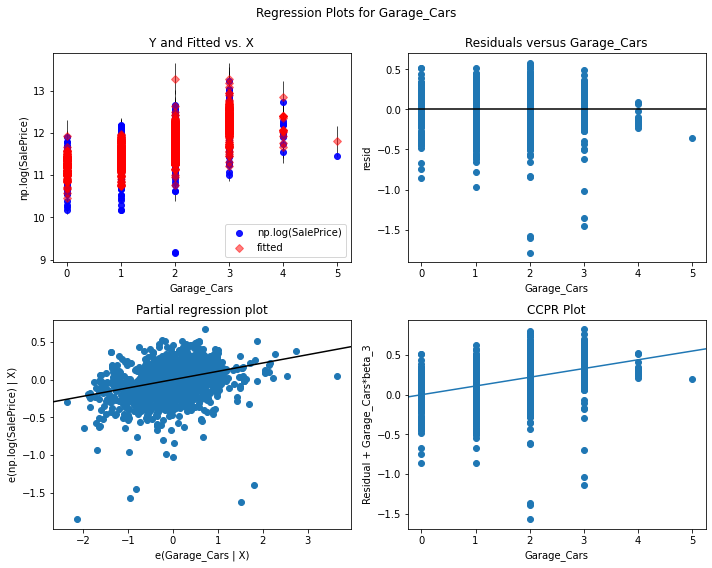

In [8]:
# regression exog plot
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(lm, "Gr_Liv_Area", fig=fig)


# regression exog plot
fig1 = plt.figure(figsize=(10,8))
fig1 = sm.graphics.plot_regress_exog(lm, "Overall_Qual", fig=fig1)

# regression exog plot
fig2 = plt.figure(figsize=(10,8))
fig2 = sm.graphics.plot_regress_exog(lm, "Garage_Cars", fig=fig2)

SalePrice         1.000000
Overall_Qual      0.802164
Gr_Liv_Area       0.706074
Garage_Cars       0.650691
Garage_Area       0.638985
Total_Bsmt_SF     0.610657
1st_Flr_SF        0.601542
Full_Bath         0.565209
Year_Built        0.556750
Year_Remod/Add    0.534925
Name: SalePrice, dtype: float64


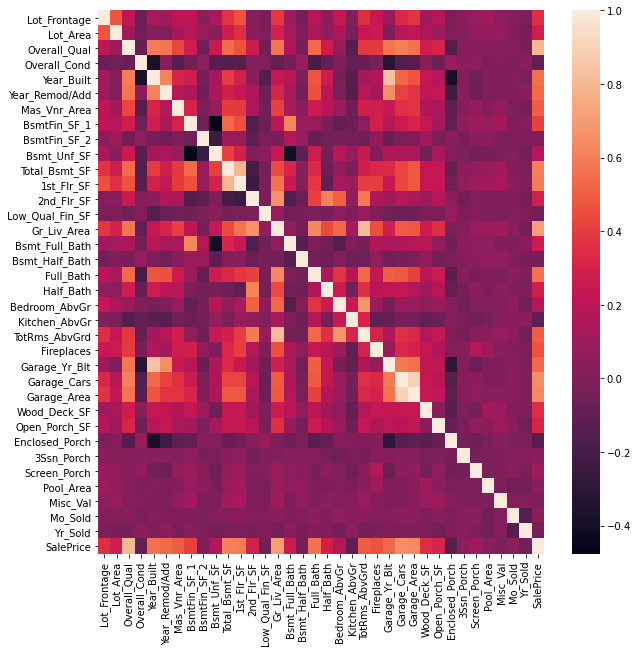

In [9]:
#Separate numeric and categorical variables
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])

#Remove the Id column
#del numeric_data['Id']

#draw Correlation Heatmap
corr = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr)
print (corr['SalePrice'].sort_values(ascending=False)[:10]) #top 10 correlations


## 2.2 Making point forecast for different predictor values
Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market? We can create a dataframe with different values of predictors we are interested in, and use the package to make the point forecast

In [10]:
zoning_mapping={'A':0, 'C':1, 'FV':2, 'I':3, 'RH':4, 'RL':5, 'RP':6, 'RM':7}
street_mapping={'Grave':0, 'Pave':1}
alley_mapping={'Grvl':0,  'Pave':1,  None:2}
lotshape_mapping={'Reg':0,  'IR1':1,  'IR2':2,  'IR3':3}
landcontour_mapping={'Lvl':0,  'Bnk':1,  'HLS':2,  'Low':3}
utilities_mapping={'AllPub':0,  'NoSewr':1,  'NoSewa':2,  'ELO':3}
saletype_mapping={'WD ':int(0),  'CWD':int(1),  'VWD':int(2),  'New':int(3), 'COD':int(4),  'Con':int(5),  'ConLw':int(6),  'ConLI':int(7), 'ConLD':int(8),  'Oth':int(9)}
salecon_mapping={'Normal':0,  'Abnorml':1,  'AdjLand':2,  'Alloca':3, 'Family':3, 'Partial':3}

data.replace({'MS_Zoning': zoning_mapping}, inplace=True)
data.replace({'Street': street_mapping}, inplace=True)
data.replace({'Alley': alley_mapping}, inplace=True)
data.replace({'Lot_Shape': lotshape_mapping}, inplace=True)
data.replace({'Land_Contour': landcontour_mapping}, inplace=True)
data.replace({'Utilities': utilities_mapping}, inplace=True)
data.replace({'Sale_Type': saletype_mapping}, inplace=True)
data.replace({'Sale_Condition': salecon_mapping}, inplace=True)
print(data.tail(20))

            MS_Zoning  Lot_Frontage  Lot_Area Street  Alley  Lot_Shape  \
MS_SubClass                                                              
60                  5          23.0       821      1      2          0   
20                  5          20.0       816      1      2          0   
20                  5           NaN      1475      1      2          1   
75                  7          18.0       669      1      2          0   
50                  7          16.0       569      1      2          0   
60                  5          20.0       786      1      2          1   
60                  5          23.0       895      1      2          0   
20                  5          26.0      1434      1      2          0   
120                 5          11.0       476      1      2          1   
50                  5          26.0       992      1      2          0   
20                  5          22.0       825      1      2          0   
20                  5          28.0   

In [11]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50, 55, 60, 100, 200]})

# use the model to make predictions on a new value
lm.predict(X_new)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Gr_Liv_Area' is not defined
    np.log(SalePrice) ~ Gr_Liv_Area + Overall_Qual + Garage_Cars
                        ^^^^^^^^^^^

## 2.3 Plotting the linear regression lines
We can make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line.

In [97]:
# create a DataFrame with the minimum and maximum values of T
X_new = pd.DataFrame({'Total_Bsmt_SF': [data.Total_Bsmt_SF.min(), data.Total_Bsmt_SF.max()]})
# make predictions for those x values and store them
preds = lm.predict(X_new)

# first, plot the observed data
data.plot(kind='scatter', x='Total_Bsmt_SF', y='SalePrice')
# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Overall_Qual' is not defined
    SalePrice ~ Total_Bsmt_SF+Overall_Qual
                              ^^^^^^^^^^^^

## 2.4 Confidence intervals for the model parameters
Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient. 

Keep in mind that we only have a single sample of data, and not the entire population of data. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

In [83]:
# print the confidence intervals for the model coefficients
lm.conf_int()

,0,1
Intercept,43905.659694,53443.375447
Total_Bsmt_SF,831.900352,922.456551


In [84]:
# summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     1443.
Date:                Tue, 15 Sep 2020   Prob (F-statistic):          3.09e-248
Time:                        16:51:53   Log-Likelihood:                -29539.
No. Observations:                2429   AIC:                         5.908e+04
Df Residuals:                    2427   BIC:                         5.909e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.867e+04   2431.922     20.015      0.000    4.39e+04    5.34e+04
Total_Bsmt_SF   877.1785     23.090     37.990      0.000     831.900     922.457
==============================================================================
Omnibus:                      503.743   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5025.618
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       9.912   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2.5 Prediction intervals for mean response and response observations
Python has built-in function to obtain the prediction intervals for the observations of the reponses. However, it needs some detailed calculation to obtain the prediction interval for the mean response. 

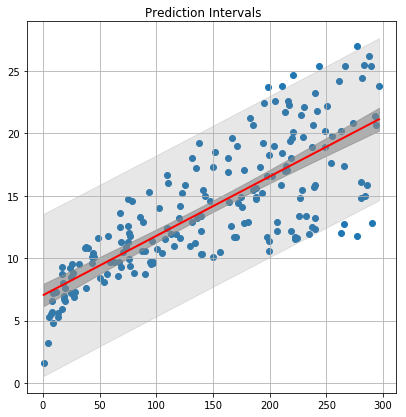

In [11]:
from statsmodels.stats.outliers_influence import summary_table

# get the summary results from the linear regression fit
st, sdata, ss2 = summary_table(lm, alpha=0.05)
fittedvalues = sdata[:,2]  # fitted values by the model
predict_mean_se  = sdata[:,3] # standard deviation of the predicted means
predict_mean_ci_low, predict_mean_ci_upp = sdata[:,4:6].T  ## lower and upper limits for the predicted means
predict_ci_low, predict_ci_upp = sdata[:,6:8].T ## lower and upper limits for the predicted observations
## the observation interval can be obtained by builtin function as follows
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# prstd, predict_ci_low, predict_ci_upp = wls_prediction_std(lm)

## plot the prediction interval
fig, ax = plt.subplots(figsize=(6, 6))
x_pred = data['TV'];
idx = np.argsort(x_pred)
ax.scatter(x_pred, data['sales'])
fig.suptitle('Prediction Intervals')
fig.tight_layout(pad=2); 
ax.grid(True)
ax.plot(x_pred.iloc[idx], fittedvalues[idx], '-', color='red', linewidth=2)
# interval for observations
ax.fill_between(x_pred.iloc[idx], predict_ci_low[idx], predict_ci_upp[idx], color='#888888', alpha=0.2)
# interval for mean responses
ax.fill_between(x_pred.iloc[idx], predict_mean_ci_low[idx], predict_mean_ci_upp[idx], color='#888888', alpha=0.6)

# 3. Simulation to demonstrate the uncertainty in estimation
Here we use simulation to show that when you use different data to estimate the model parameters, you can get different results. However, the estimated values follow normal distribution around the true values. The uncertainty depends on the sample size, and the scatters of the points. 

In [12]:
# simulation settings
n = 100  # sample size of the least square
nrep = 1000 # replication of the simulation
b0 = 1 # intercept of the model
b1 = 2 # slope of the model
sigma = 0.4  # variance of the error terms

## create the array to store the estimated parameters
b0hat = np.zeros(nrep)
b1hat = np.zeros(nrep)

# start the simulation replication
for i in range(nrep):
    # generate samples from the true model
    x = np.random.uniform(0,1,n)
    y = b0+b1*x+np.random.normal(0,sigma, n)
    simdata = pd.DataFrame({'X': x, 'Y': y});
    
    # create a fitted model
    lm = smf.ols(formula='Y ~ X', data=simdata).fit()
    # obtain the coefficients
    pp = lm.params
    b0hat[i] = pp[0]
    b1hat[i] = pp[1]

Text(0,0.5,'Frequency')

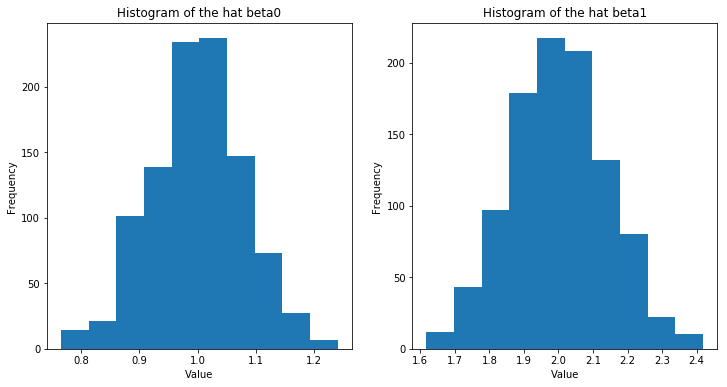

In [13]:
# Histogram of the estimated parameters
plt.subplots(1,2, figsize=(12,6))
plt.subplot(121)
plt.hist(b0hat)
plt.title("Histogram of the hat beta0")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.subplot(122)
plt.hist(b1hat)
plt.title("Histogram of the hat beta1")
plt.xlabel("Value")
plt.ylabel("Frequency")